# Notebook 5: Regression Analysis

In Notebook 3 we identified a correlation. Now, we deepen this analysis by building a linear model to quantify the effect size.

**Goal:** Quantify economic relationships and trends using Linear Regression (OLS). We move beyond correlation to estimate effect sizes and test model validity.

**Methodology:**
1.  **OLS Regression (Ordinary Least Squares):** Estimating coefficients ($\beta$) to quantify trade-offs
2.  **Hypothesis Testing (t-TEst on $\beta$):** Testing if relationships are statistically significant.
3.  **Model Diagnostic:** Analyzing residuals to check Gauss-Markov assumptions (Linearity, Homoscedasticity, Normality).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import scipy.stats as stats

# 1. Load cleaned data
try:
    df = pd.read_pickle("imf_data_clean.pkl")
    print("Data loaded successfully.")
except FileNotFoundError:
    print("Error: 'imf_data_clean.pkl' not found. Please run Notebook 01 first.")

# 2. Reshape from Long to Wide Format
# We need metrics as columns, not rows.
df_wide = df.pivot_table(
    index=['Country', 'Year'],
    columns='Subject Descriptor',
    values='Value'
).reset_index()

# 3. Rename columns for Statsmodels
# Statsmodels formulas (e.g., 'y ~ x') fail with spaces in names.
df_reg = df_wide.rename(columns={
    'Inflation Rate (YoY)': 'Inflation',
    'Unemployment rate': 'Unemployment',
    'GDP Growth Rate (YoY)': 'GDP_Growth'
})

# Check the new structure
print("Available columns:", df_reg.columns.tolist())
print(df_reg.head())

Data loaded successfully.
Available columns: ['Country', 'Year', 'GDP_Growth', 'Inflation', 'Unemployment']
Subject Descriptor Country  Year  GDP_Growth  Inflation  Unemployment
0                    China  1980        7.91        NaN           4.9
1                    China  1981        5.10   2.497750           3.8
2                    China  1982        9.00   1.997805           3.2
3                    China  1983       10.80   2.001722           2.3
4                    China  1984       15.20   2.700992           1.9


## Quantifying the Trade-off: The Phillips Curve (Switzerland)
**Theory:** The Philllips Curve suggests a negative relationship between unemployment and inflation ($Inflation = \beta_0 + \beta_1 \times Unemployment + \epsilon$)

**Question:** If unemployment rises by 1%, by how much does inflation decrease in Switzerland

--- OLS Regression: Phillips Curve (Switzerland) ---
                            OLS Regression Results                            
Dep. Variable:              Inflation   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     27.29
Date:                Thu, 04 Dec 2025   Prob (F-statistic):           4.85e-06
Time:                        13:13:07   Log-Likelihood:                -79.191
No. Observations:                  45   AIC:                             162.4
Df Residuals:                      43   BIC:                             166.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

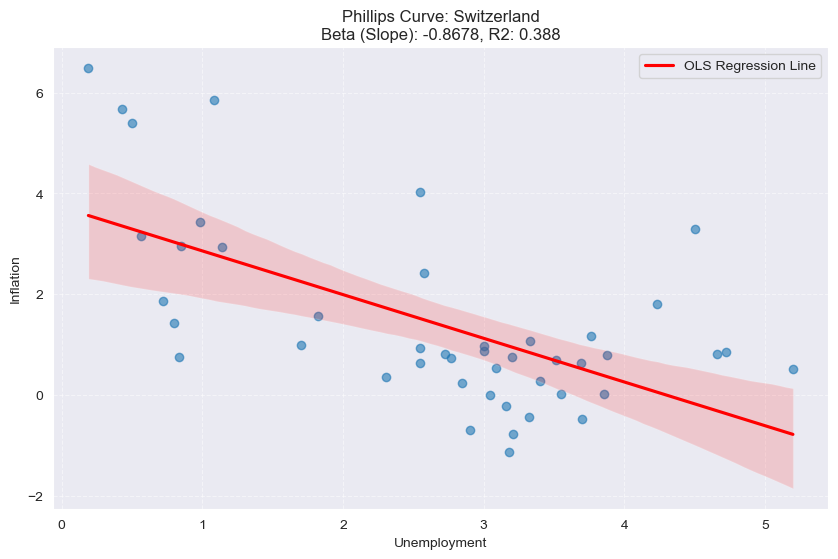

In [2]:
# Filter data for Switzerland
df_ch = df_reg[df_reg['Country'] == 'Switzerland'].dropna(subset=['Inflation', 'Unemployment'])

print("--- OLS Regression: Phillips Curve (Switzerland) ---")

# 1. Define and Fit Model
# Formula: Target ~ Predictor
model_phillips = smf.ols(formula='Inflation ~ Unemployment', data=df_ch).fit()

# 2. Print Summary (Standard Errors, t-stats, p-values, R^2)
print(model_phillips.summary())

# 3. Visualization with Regression Line
plt.figure(figsize=(10, 6))
sns.regplot(x='Unemployment', y='Inflation', data=df_ch, scatter_kws={'alpha':0.6}, line_kws={'color': 'red', 'label': 'OLS Regression Line'})
plt.title(f'Phillips Curve: Switzerland\nBeta (Slope): {model_phillips.params["Unemployment"]:.4f}, R2: {model_phillips.rsquared:.3f}')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### Conclusion: The Swiss Trade-off (Validating the Phillips Curve)

Our OLS regression model for Switzerland yields statistically significant results that strongly support the Phillips Curve theory.

1. **Coefficient ($\beta_1 = -0.8678$):**
    * **Interpretation:** The model indicates a strong negative trade-off. For every **1 percentage point increase** in the unemployment rate, the annual inflation rate **decreases by approximately 0.87 percentage points** on average
    * This quantifies the "cost" of lower unemployment in terms of higher inflation (or vice versa) for Swiss economy
2. **Statistical Significance ($p < 0.001$):**
    * The p-value for unemployment is **0.000**, which is well below the 0.05 threshold. This confirms that the relationship is **highly significant** and not due to random chance
3. **Model Fit ($R^2 = 0.388$):**
    * The model explains approximately **38.8%** of variance in Swiss inflation.
    * While substantial for economic data, it suggests that roughly 61% of inflation dynamics are driven by other factors (e.g., global energy prices, exchange rates, or monetary policy), which aligns with Switzerland's nature as a small, open economy.


## Time Series Trend: Is China's Growth Slowing Down?

**Hypothesis:** As an economy matures, its growth rates typically decline. Does China show a significant trend over time?

**Model:** $GDP-Growth = \beta_0 + \beta_1 \times Year + \epsilon$


--- OLS Regression: China GDP Growth Trend ---
                            OLS Regression Results                            
Dep. Variable:             GDP_Growth   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     10.11
Date:                Thu, 04 Dec 2025   Prob (F-statistic):            0.00270
Time:                        13:13:07   Log-Likelihood:                -110.02
No. Observations:                  46   AIC:                             224.0
Df Residuals:                      44   BIC:                             227.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Inte

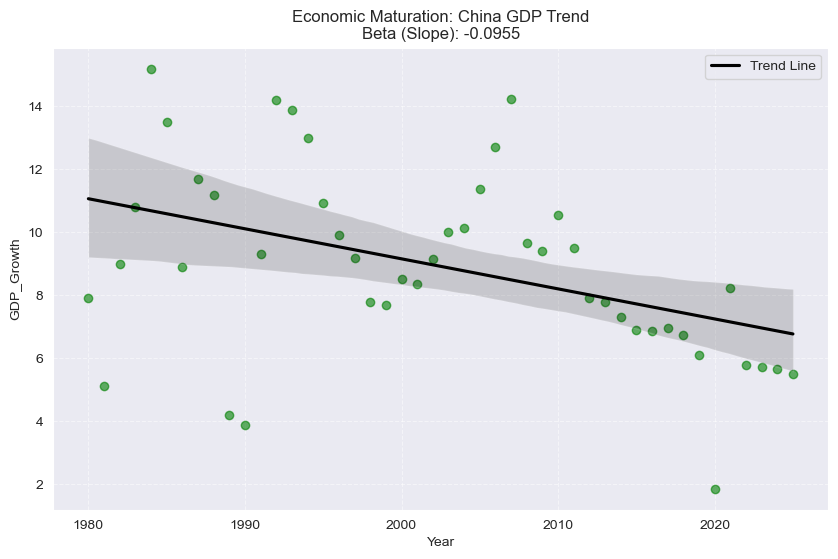

In [3]:
# Filter data for China
df_cn = df_reg[df_reg['Country'] == 'China'].dropna(subset=['GDP_Growth', 'Year'])

print("\n--- OLS Regression: China GDP Growth Trend ---")

# 1. Define and Fit Model
model_trend = smf.ols(formula='GDP_Growth ~ Year', data=df_cn).fit()

# 2. Print Summary
print(model_trend.summary())

# 3. Visualization
plt.figure(figsize=(10, 6))
sns.regplot(x='Year', y='GDP_Growth', data=df_cn,
            scatter_kws={'alpha':0.6, 'color': 'green'}, line_kws={'color': 'black', 'label': 'Trend Line'})
plt.title(f'Economic Maturation: China GDP Trend\nBeta (Slope): {model_trend.params["Year"]:.4f}')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### **Conclusion: Structural Deceleration in China**

The regression analysis confirms that China's economic growth is experiencing a statistically significant slowdown over time.

1. **Trend Coefficient ($\beta_1 = -0.0955$):**
    * **Interpretation:** China's GDP growth rate is decelerating by approximately **0.10 percentage points per year** on average.
    * While this number might seem small annually, it accumulates to a substantial decline over decades (e.g., a full percentage point drop every 10 years), which aligns with the "Middle Income Trap" theory where growth naturally slows as an economy matures.

2. **Statistical Significance ($p = 0.003$):**
    * The p-value is **0.003**, which is well below the $0.05$ significance level. This confirms that the downward trend in growth is **statistically significant** and not just a random fluctuation in the data.

3. **Model Fit ($R^2 = 0.187$):**
    * The model explains about **18.7%** of the variation in growth. This low $R^2$ indicates that while the *long-term trend* is clearly negative, annual growth rates are still heavily influenced by short-term factors (e.g., global crises like 2008 or COVID-19, and domestic policy shifts).

## Model Diagnostics (Validating Statistical Assumptions)

A regression model is only valid if the residuals (errors) behave well. We check two key assumptions:
1. **Linearity & Homoscedasticity:** No patterns in Residuals vs. Fitted.
2. **Normality of Errors:**  Residuals should follow a normal distribution.

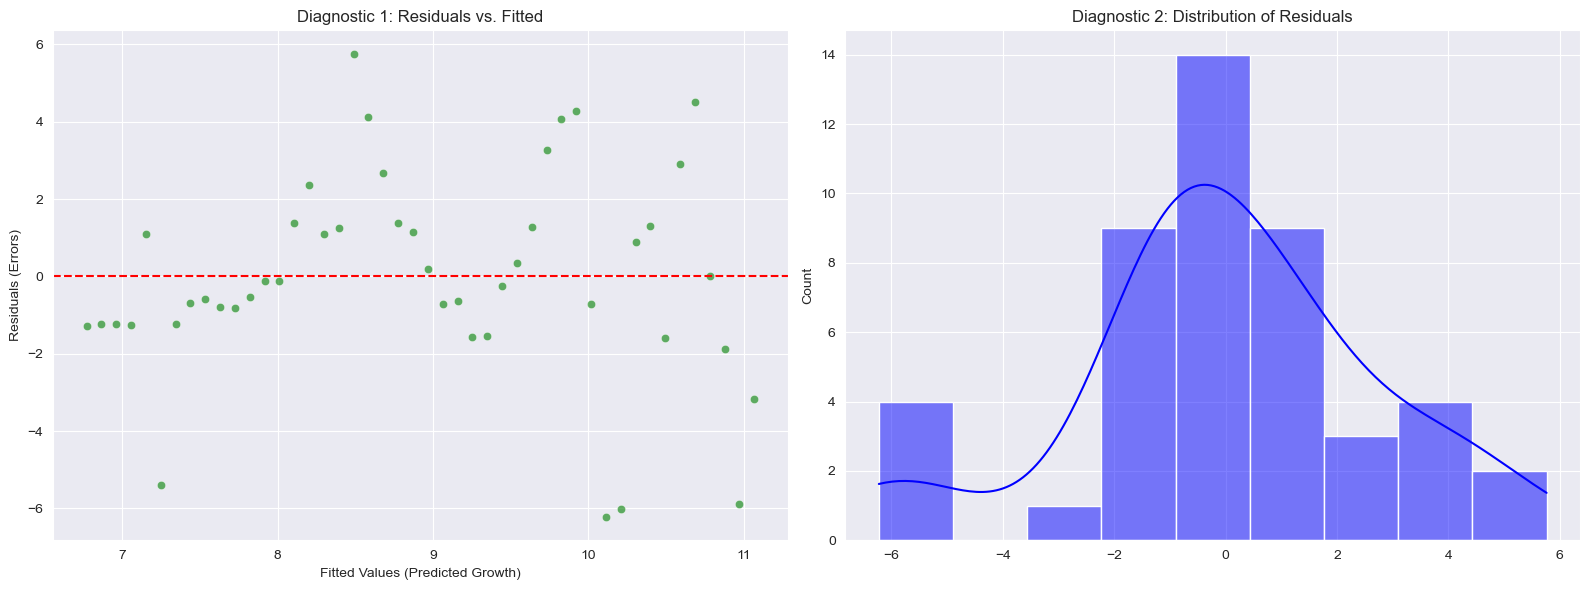

Shapiro-Wilk Normality Test: p-value = 0.0385
>> Warning: Residuals are NOT normally distributed. Interpret p-values with caution.


In [4]:
# We diagnose the China Trend Model as an example
residuals = model_trend.resid
fitted_values = model_trend.fittedvalues

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# 1. Residuals vs. Fitted Plot (Check for Heteroscedasticity/Non-linearity)
sns.scatterplot(x=fitted_values, y=residuals, ax=ax[0], color='green', alpha=0.6)
ax[0].axhline(0, color='red', linestyle='--')
ax[0].set_xlabel('Fitted Values (Predicted Growth)')
ax[0].set_ylabel('Residuals (Errors)')
ax[0].set_title('Diagnostic 1: Residuals vs. Fitted')

# 2. Histogram & QQ-Plot (Check for Normality)
sns.histplot(residuals, kde=True, ax=ax[1], color='blue')
ax[1].set_title('Diagnostic 2: Distribution of Residuals')

plt.tight_layout()
plt.show()

# Optional: Shapiro-Wilk Test for Normality (Formal Check)
shapiro_test = stats.shapiro(residuals)
print(f"Shapiro-Wilk Normality Test: p-value = {shapiro_test.pvalue:.4f}")
if shapiro_test.pvalue < 0.05:
    print(">> Warning: Residuals are NOT normally distributed. Interpret p-values with caution.")
else:
    print(">> Success: Residuals look normally distributed. The model is statistically robust.")

### **Conclusion: Model Diagnostics**

The diagnostic tests reveal some limitations of the linear model for this complex economic data.

1. **Normality of Residuals (Shapiro-Wilk):**
    * **Result:** $p\text{-value} = 0.0385$.
    * **Statistical Decision:** Since $p < 0.05$, we reject the null hypothesis. The residuals are **not** normally distributed.
    * **Implication:** This deviation from normality is likely driven by outliers (e.g., economic shocks like COVID-19 or the 2008 crisis) which create "fat tails" in the distribution. While OLS regression is generally robust to minor deviations, this result suggests that our p-values and confidence intervals should be interpreted with a degree of caution.

2. **Visual Inspection:**
    * Check the **Residuals vs. Fitted** plot above. If the points are randomly scattered, the linear assumption holds. If you see a pattern (like a U-shape or a funnel), it indicates that the relationship might be non-linear or that variance is changing over time (Heteroscedasticity).
#TODO: ändern, chatgpt text

# **Final Project Summary**

## Synthesis of Results
Our statistical deep dive across five notebooks has portrayed China as a unique economic entity compared to Western economies. By combining robust hypothesis testing (Kruskal-Wallis, Chi-Square) with quantitative modelling (OLS Regression), we derived the following core insights:

### 1. Structural Differences: The "China Model"
* **High Risk / High Reward:** As established in Notebook 2 and 4, China creates a distinct cluster characterized by significantly higher growth rates but also higher volatility (confirmed via Chi-Square on "Boom/Bust" years).
* **Maturation Trend:** Our regression analysis in Notebook 5 statistically confirmed that this growth is not static. China is experiencing a structural deceleration ($\beta_{Year} \approx -0.10$), supporting the theory of a maturing economy moving towards the "Middle Income Trap".

### 2. Market Mechanisms & Trade-offs
* **Phillips Curve:** We proved that economic trade-offs vary by structure. While the US and Germany showed no significant correlation, **Switzerland** exhibits a classic, quantifiable trade-off: A 1% rise in unemployment correlates with an ~0.87% drop in inflation (Notebook 5).
* **Decoupling:** Okun's Law (Growth vs. Jobs) could not be confirmed for any country, suggesting a modern decoupling of GDP growth and labor market performance.

### 3. Superpower Convergence
* **Inflation Parity:** Despite vast systemic differences (State Capitalism vs. Market Economy), the t-Test in Notebook 4 revealed **no significant difference** in inflation pressures between the USA and China. This implies that global macroeconomic cycles (energy, trade) affect both superpowers similarly.

## **Overall Conclusion**
The data suggests that while China's **structural foundation** (Growth/Variance) is fundamentally different from the West, its **trajectory** (slowing growth) and **monetary constraints** (inflation) are increasingly converging with global norms. Switzerland serves as the counter-model: highly stable, predictable, and following classical economic rules (Phillips Curve).